Projeto: Regressão Linear Simples (RLS)

Objetivo

Avaliar se a variável idade (age) exerce influência significativa sobre o valor do seguro (charges), identificando a direção e a força dessa relação no Insurance Charges Dataset.

Método aplicado

Utilizou-se Regressão Linear Simples (OLS) para modelar a relação entre idade e custo do seguro. O método estima uma linha de tendência que descreve como alterações na idade impactam o valor do seguro, considerando coeficientes, p-values e R² para avaliar significância e ajuste do modelo.

Dataset

A análise foi conduzida com o Insurance Charges Dataset, composto por informações demográficas e financeiras dos segurados. O estudo concentrou-se nas variáveis age e charges, complementando com visualizações e correlação para apoiar a interpretação dos resultados.

Link Kaggle: https://www.kaggle.com/datasets/mirichoi0218/insurance

In [ ]:
import pandas as pd # manipulação de dados em formato de dataframe
import seaborn as sns # biblioteca de visualização de informações estatísticas
import matplotlib.pyplot as plt # biblioteca de visualização de dados
import statsmodels.api as sm # biblioteca de modelagem estatística
import numpy as np # biblioteca para operações matemáticas multidimensionais
from statsmodels.iolib.summary2 import summary_col # comparação entre modelos
import plotly.graph_objs as go # gráfico 3D
from scipy.stats import pearsonr # correlações de Pearson
from sklearn.preprocessing import LabelEncoder # transformação de dados


In [25]:
# Função Auxiliar
# Verifica se o modelo de regressão é estatisticamente significativo.
def checar_significancia_modelo(modelo, alpha=0.05):
    """
    Parâmetros:
        modelo : objeto de regressão do statsmodels (ex.: OLS.fit())
        alpha  : nível de significância (default = 0.05)

    Retorna:
        str : mensagem indicando se o modelo é significativo.
    """

    p_valor = modelo.f_pvalue  # p-value do teste F

    if p_valor < alpha:
        return f"O modelo é estatisticamente significativo (p-value = {p_valor:.4e})."
    else:
        return f"O modelo NÃO é estatisticamente significativo (p-value = {p_valor:.4e})."

In [ ]:
# Importar o banco de dados
    
df = pd.read_csv('insurance.csv', delimiter=',')

In [4]:
#Características das variáveis do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
#Estatísticas univariadas
df.describe()

In [ ]:
# Análise das 5 primeiras linhas do dataset
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
# Análise das 5 ultimas linhas do dataset
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [ ]:
# Quantidade de Linhas e Coluna
df.shape

(1338, 7)

In [ ]:
# Formato das variaveis
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

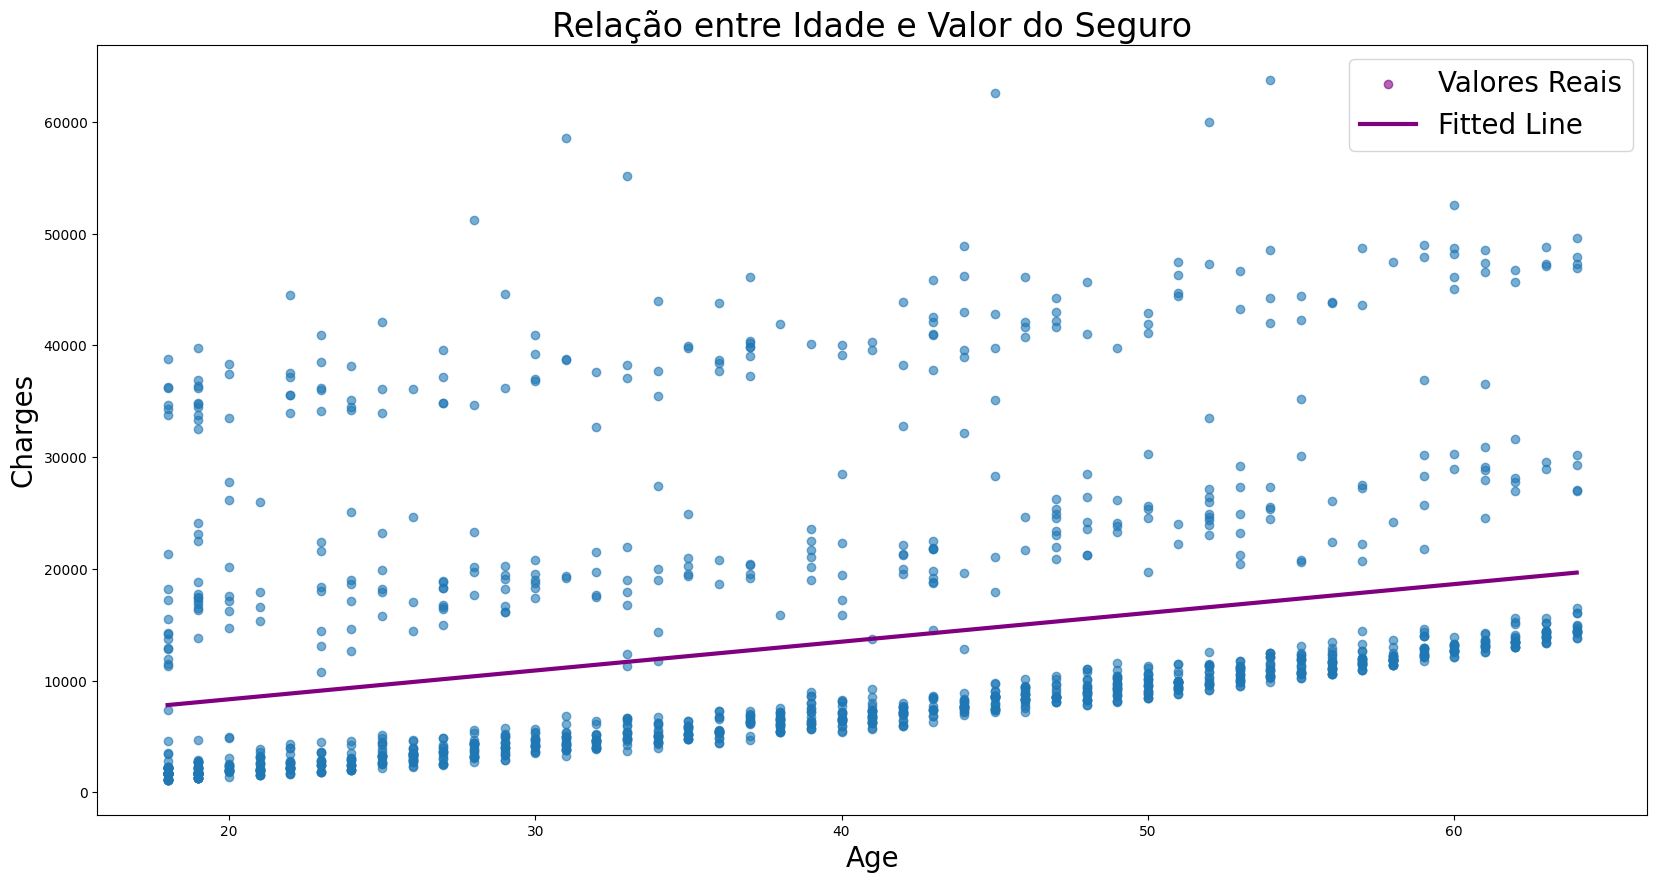

In [30]:

# Gráfico de dispersão

plt.figure(figsize=(20,10))
sns.regplot(
    data=df, 
    x='age', 
    y='charges', 
    ci=False, 
    scatter_kws={'alpha':0.6},  # deixa os pontos mais transparentes
    line_kws={'color':'purple', 'linewidth':3}
)

plt.xlabel('Age', fontsize=20)
plt.ylabel('Charges', fontsize=20)

plt.title('Relação entre Idade e Valor do Seguro', fontsize=24)

# criar legenda manual
plt.scatter([], [], color='purple', alpha=0.6, label='Valores Reais')
plt.plot([], [], color='purple', linewidth=3, label='Fitted Line')

plt.legend(fontsize=20)

plt.show()


In [ ]:
# Estimação do modelo de regressão linear simples

# Estimação do modelo
modelo = sm.OLS.from_formula('charges ~ age', df).fit()

# Observação dos parâmetros resultantes da estimação
modelo.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     131.2
Date:                Sat, 29 Nov 2025   Prob (F-statistic):           4.89e-29
Time:                        11:04:07   Log-Likelihood:                -14415.
No. Observations:                1338   AIC:                         2.883e+04
Df Residuals:                    1336   BIC:                         2.884e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3165.8850    937.149      3.378      0.001    1327.440    5004.330
age          257.7226     22.502     11.453      0.000     213.579     301.866
==============================================================================
Omnibus:                      399.600   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              864.239
Skew:                           1.733   Prob(JB):                    2.15e-188
Kurtosis:                       4.869   Cond. No.                         124.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Verifica se o modelo de regressão é estatisticamente significativo:
resultado = checar_significancia_modelo(modelo)
print(resultado)

O modelo é estatisticamente significativo (p-value = 4.8867e-29).


Resultado: O p-valor extremamente baixo (4.89e-29) mostra que a idade realmente influencia os custos do seguro. Isso confirma que existe uma relação estatisticamente consistente entre envelhecimento e aumento das despesas médicas seguradas. Embora a idade explique apenas parte da variação (8,9%) do valor final, ela é um fator relevante e não pode ser ignorado na análise.

In [27]:
# Fazendo predições em modelos OLS
# Qual seria o custo do seguro (charges), em média, para uma pessoal com 37 anos?

modelo.predict(pd.DataFrame({'age':[37]}))

0    12701.621897
dtype: float64

In [ ]:
#Cálculo manual - mesmo valor encontrado
#Resultado do Coef. Intercepto
#Intercepto: 3165.885
#Coeficiente da idade: 257.7226

3165.8850 + 257.7226*(37)


12701.6212

Para uma pessoa de 37 anos, o modelo de regressão simples prevê que o custo do seguro (charges) será de aproximadamente R$12,7 mil, considerando que cada ano adicional de idade aumenta o valor estimado do seguro.